In [1]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


## Import

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Description

**school** - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)  
**sex** - student's sex (binary: 'F' - female or 'M' - male)  
**age** - student's age (numeric: from 15 to 22)  
**address** - student's home address type (binary: 'U' - urban or 'R' - rural)  
**famsize** - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)  
**Pstatus** - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)  
**Medu** - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)  
**Fedu** - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)  
**Mjob** - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')  
**Fjob** - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')  
**reason** - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')  
**guardian** - student's guardian (nominal: 'mother', 'father' or 'other')  
**traveltime** - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)  
**studytime** - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)  
**failures** - number of past class failures (numeric: n if 1<=n<3, else 4)  
**schoolsup** - extra educational support (binary: yes or no)  
**famsup** - family educational support (binary: yes or no)  
**paid** - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)  
**activities** - extra-curricular activities (binary: yes or no)  
**nursery** - attended nursery school (binary: yes or no)  
**higher** - wants to take higher education (binary: yes or no)  
**internet** - Internet access at home (binary: yes or no)  
**romantic** - with a romantic relationship (binary: yes or no)  
**famrel** - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)  
**freetime** - free time after school (numeric: from 1 - very low to 5 - very high)  
**goout** - going out with friends (numeric: from 1 - very low to 5 - very high)  
**Dalc** - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)  
**Walc** - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)  
**health** - current health status (numeric: from 1 - very bad to 5 - very good)  
**absences** - number of school absences (numeric: from 0 to 93)  

These grades are related to the course subject, Math or Portuguese:

**G1** - first period grade (numeric: from 0 to 20)  
**G2** - second period grade (numeric: from 0 to 20)  
**G3** - final grade (numeric: from 0 to 20, output target)


## Dataframes

### Merged

In [100]:
df_mat = pd.read_csv('data/student-mat.csv')
df_por = pd.read_csv('data/student-por.csv')

print(df_mat.shape)
print(df_por.shape)

(395, 33)
(649, 33)


In [4]:
df_por.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12


In [5]:
df_por.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [6]:
df_por.shape

(649, 33)

In [7]:
keys_to_merge = [
    'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
    'Mjob', 'Fjob', 'reason', 'nursery', 'internet'
]

merged_df = df_mat.merge(df_por, on=keys_to_merge, suffixes=('_mat', '_por'))

merged_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
378,MS,F,18,U,GT3,T,1,1,other,other,...,3,4,4,2,2,5,3,7,8,7
379,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
380,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [8]:
merged_df.shape

(382, 53)

In [9]:
merged_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian_mat', 'traveltime_mat',
       'studytime_mat', 'failures_mat', 'schoolsup_mat', 'famsup_mat',
       'paid_mat', 'activities_mat', 'nursery', 'higher_mat', 'internet',
       'romantic_mat', 'famrel_mat', 'freetime_mat', 'goout_mat', 'Dalc_mat',
       'Walc_mat', 'health_mat', 'absences_mat', 'G1_mat', 'G2_mat', 'G3_mat',
       'guardian_por', 'traveltime_por', 'studytime_por', 'failures_por',
       'schoolsup_por', 'famsup_por', 'paid_por', 'activities_por',
       'higher_por', 'romantic_por', 'famrel_por', 'freetime_por', 'goout_por',
       'Dalc_por', 'Walc_por', 'health_por', 'absences_por', 'G1_por',
       'G2_por', 'G3_por'],
      dtype='object')

### Pre-processing


#### Reorganisation

In [10]:
data = merged_df
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [11]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian_mat', 'traveltime_mat',
       'studytime_mat', 'failures_mat', 'schoolsup_mat', 'famsup_mat',
       'paid_mat', 'activities_mat', 'nursery', 'higher_mat', 'internet',
       'romantic_mat', 'famrel_mat', 'freetime_mat', 'goout_mat', 'Dalc_mat',
       'Walc_mat', 'health_mat', 'absences_mat', 'G1_mat', 'G2_mat', 'G3_mat',
       'guardian_por', 'traveltime_por', 'studytime_por', 'failures_por',
       'schoolsup_por', 'famsup_por', 'paid_por', 'activities_por',
       'higher_por', 'romantic_por', 'famrel_por', 'freetime_por', 'goout_por',
       'Dalc_por', 'Walc_por', 'health_por', 'absences_por', 'G1_por',
       'G2_por', 'G3_por'],
      dtype='object')

In [12]:
# Obtenez la liste des colonnes qui contiennent '_mat' et '_por'
matporcol = [col for col in data.columns if '_mat' in col or '_por' in col]

# On supprime les suffixes puis les duplicates pour obtenir les noms uniques des colonnes
cols_unique = data[matporcol].columns.str.replace('_mat','').str.replace('_por','').drop_duplicates()

#On drop les résultats d'examen car différents
cols_unique = cols_unique.drop(cols_unique[-3:])
cols_unique

Index(['guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'famsup', 'paid', 'activities', 'higher', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences'],
      dtype='object')

In [13]:
# Créer une liste de paires de colonnes à fusionner
column_pairs = [(col + '_mat', col + '_por') for col in cols_unique]

print(column_pairs)

[('guardian_mat', 'guardian_por'), ('traveltime_mat', 'traveltime_por'), ('studytime_mat', 'studytime_por'), ('failures_mat', 'failures_por'), ('schoolsup_mat', 'schoolsup_por'), ('famsup_mat', 'famsup_por'), ('paid_mat', 'paid_por'), ('activities_mat', 'activities_por'), ('higher_mat', 'higher_por'), ('romantic_mat', 'romantic_por'), ('famrel_mat', 'famrel_por'), ('freetime_mat', 'freetime_por'), ('goout_mat', 'goout_por'), ('Dalc_mat', 'Dalc_por'), ('Walc_mat', 'Walc_por'), ('health_mat', 'health_por'), ('absences_mat', 'absences_por')]


In [14]:
# Boucle pour fusionner les colonnes en paires similaires
for col_mat, col_por in column_pairs:
    data[col_mat] = data[col_mat].where(data[col_mat] == data[col_por])

# Supprimer les colonnes '_y' après la fusion si nécessaire
for _, col_por in column_pairs:
    data.drop(columns=[col_por], inplace=True)

data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc_mat,Walc_mat,health_mat,absences_mat,G1_mat,G2_mat,G3_mat,G1_por,G2_por,G3_por
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1.0,1.0,3.0,NaN,5,6,6,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1.0,1.0,3.0,NaN,5,5,6,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2.0,3.0,3.0,NaN,7,8,10,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,1.0,1.0,5.0,NaN,15,14,15,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,1.0,2.0,5.0,NaN,6,10,10,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,MS,F,18,U,LE3,T,3,1,teacher,services,...,1.0,1.0,1.0,NaN,7,9,8,15,15,16
378,MS,F,18,U,GT3,T,1,1,other,other,...,NaN,NaN,5.0,NaN,6,5,0,7,8,7
379,MS,F,18,U,GT3,T,1,1,other,other,...,1.0,1.0,5.0,NaN,6,5,0,11,12,9
380,MS,M,17,U,LE3,T,3,1,services,services,...,3.0,4.0,2.0,NaN,14,16,16,10,10,10


In [15]:
def merge_dataframes(df1, df2):

    # Columns used for merging
    keys_to_merge = [
        'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
        'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet'
    ]

    # Merge DataFrames using the merge keys and adding suffixes to columns in case of duplicates
    merged_df = df1.merge(df2, on=keys_to_merge, suffixes=('_mat', '_por'))

    # Get the list of columns that contain '_mat' and '_por'
    matporcol = [
        col for col in merged_df.columns if '_mat' in col or '_por' in col
    ]

    # Remove the suffixes and then duplicates to obtain unique column names
    cols_unique = merged_df[matporcol].columns.str.replace(
        '_mat', '').str.replace('_por', '').drop_duplicates()

    # Remove exam results as they are different for the two datasets
    cols_unique = cols_unique.drop(cols_unique[-3:])

    # Create a list of column pairs to merge similar columns
    column_pairs = [(col + '_mat', col + '_por') for col in cols_unique]

    # Loop to merge columns in similar pairs
    for col_mat, col_por in column_pairs:
        merged_df[col_mat] = merged_df[col_mat].where(
            merged_df[col_mat] == merged_df[col_por])

    # Remove the '_y' columns after merging if needed
    for _, col_por in column_pairs:
        merged_df.drop(columns=[col_por], inplace=True)

    return merged_df


test_df = merge_dataframes(df_mat, df_por)

In [16]:
test_df.equals(data)

True

In [17]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian_mat', 'traveltime_mat',
       'studytime_mat', 'failures_mat', 'schoolsup_mat', 'famsup_mat',
       'paid_mat', 'activities_mat', 'nursery', 'higher_mat', 'internet',
       'romantic_mat', 'famrel_mat', 'freetime_mat', 'goout_mat', 'Dalc_mat',
       'Walc_mat', 'health_mat', 'absences_mat', 'G1_mat', 'G2_mat', 'G3_mat',
       'G1_por', 'G2_por', 'G3_por'],
      dtype='object')

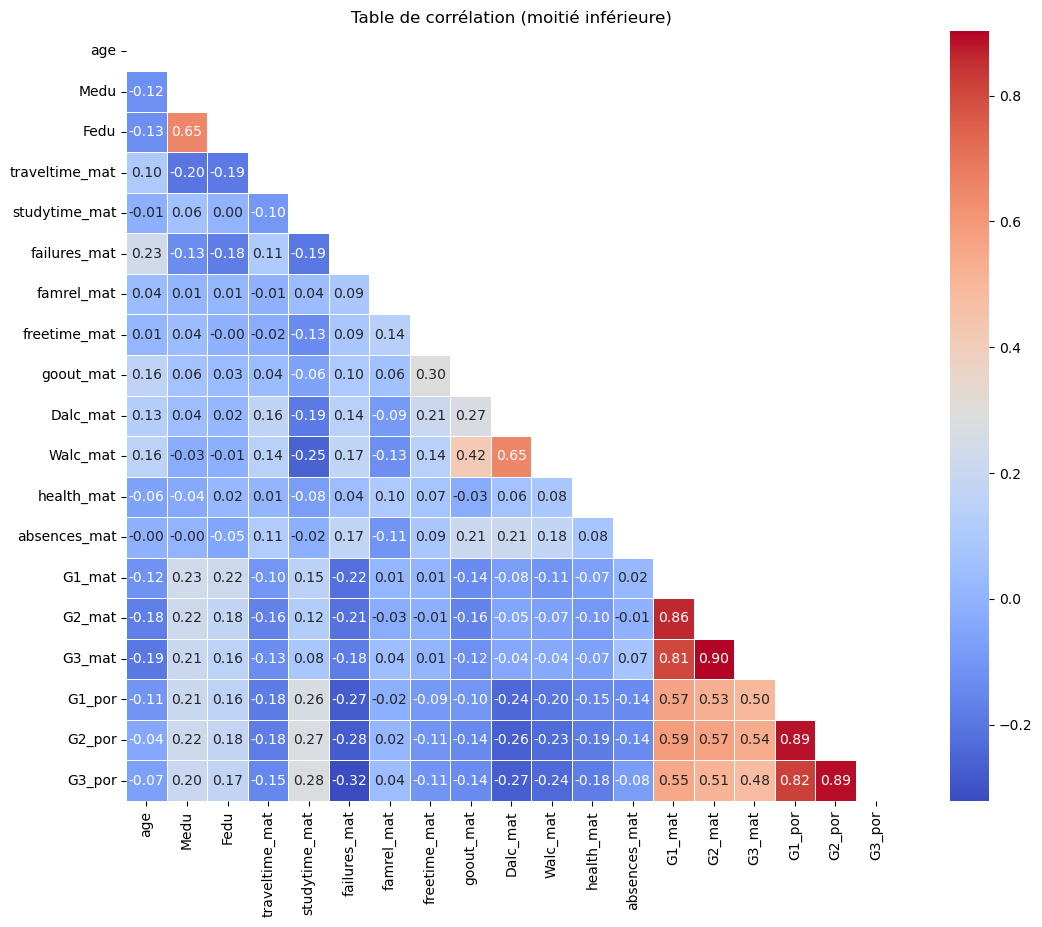

In [18]:
correlation_matrix = data.corr()

# Créer un masque pour la moitié supérieure de la table de corrélation
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Tracer la table de corrélation en escalier (heatmap) avec la moitié supérieure masquée
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True,
            mask=mask)
plt.title('Table de corrélation (moitié inférieure)')
plt.show()

#### Data cleaning


In [19]:
df = data.copy()
df.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc_mat,Walc_mat,health_mat,absences_mat,G1_mat,G2_mat,G3_mat,G1_por,G2_por,G3_por
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1.0,1.0,3.0,NaN,5,6,6,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1.0,1.0,3.0,NaN,5,5,6,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2.0,3.0,3.0,NaN,7,8,10,12,13,12


In [20]:
#Rename cols pour lisibilité
columns_to_exclude = ['G1_mat', 'G2_mat', 'G3_mat', 'G1_por', 'G2_por', 'G3_por']

columns_to_rename = [col for col in df.columns if col not in columns_to_exclude]

for col in columns_to_rename:
    if col.endswith('_mat'):
        new_col_name = col.replace('_mat', '')
        df.rename(columns={col: new_col_name}, inplace=True)

df.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1_mat,G2_mat,G3_mat,G1_por,G2_por,G3_por
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1.0,1.0,3.0,NaN,5,6,6,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1.0,1.0,3.0,NaN,5,5,6,9,11,11


In [21]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1_mat', 'G2_mat', 'G3_mat', 'G1_por',
       'G2_por', 'G3_por'],
      dtype='object')

In [22]:
df.shape

(382, 36)

In [23]:
df2 = df.copy()

##### Convert dtypes

In [24]:
# Binary

# school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
df['school'] = df['school'].replace({'GP': 0, 'MS': 1})

# sex - student's sex (binary: 'F' - female or 'M' - male)
df['sex'] = df['sex'].replace({'F': 0, 'M': 1})

# address - student's home address type (binary: 'U' - urban or 'R' - rural)
df['address'] = df['address'].replace({'U': 0, 'R': 1})

# famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
df['famsize'] = df['famsize'].replace({'LE3': 0, 'GT3': 1})

# Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
df['Pstatus'] = df['Pstatus'].replace({'T': 0, 'A': 1})

# schoolsup - extra educational support (binary: yes or no)
df['schoolsup'] = df['schoolsup'].replace({'yes': 1, 'no': 0})

# famsup - family educational support (binary: yes or no)
df['famsup'] = df['famsup'].replace({'yes': 1, 'no': 0})

# paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
df['paid'] = df['paid'].replace({'yes': 1, 'no': 0})

# activities - extra-curricular activities (binary: yes or no)
df['activities'] = df['activities'].replace({'yes': 1, 'no': 0})

# nursery - attended nursery school (binary: yes or no)
df['nursery'] = df['nursery'].replace({'yes': 1, 'no': 0})

# higher - wants to take higher education (binary: yes or no)
df['higher'] = df['higher'].replace({'yes': 1, 'no': 0})

# internet - Internet access at home (binary: yes or no)
df['internet'] = df['internet'].replace({'yes': 1, 'no': 0})

# romantic - with a romantic relationship (binary: yes or no)
df['romantic'] = df['romantic'].replace({'yes': 1, 'no': 0})

# Other

# Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
df['Mjob'] = df['Mjob'].replace({'teacher': 1, 'health': 2, 'services': 3, 'at_home': 4, 'other': 5})

# Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
df['Fjob'] = df['Fjob'].replace({'teacher': 1, 'health': 2, 'services': 3, 'at_home': 4, 'other': 5})

# reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
df['reason'] = df['reason'].replace({'home': 1, 'reputation': 2, 'course': 3, 'other': 4})

# guardian - student's guardian (nominal: 'mother', 'father' or 'other')
df['guardian'] = df['guardian'].replace({'mother': 1, 'father': 2, 'other': 3})

In [25]:
dfbis = df.copy()
df.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1_mat,G2_mat,G3_mat,G1_por,G2_por,G3_por
0,0,0,18,0,1,1,4,4,4,1,...,1.0,1.0,3.0,NaN,5,6,6,0,11,11
1,0,0,17,0,1,0,1,1,4,5,...,1.0,1.0,3.0,NaN,5,5,6,9,11,11
2,0,0,15,0,0,0,1,1,4,5,...,2.0,3.0,3.0,NaN,7,8,10,12,13,12


In [26]:
dfbis.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1_mat', 'G2_mat', 'G3_mat', 'G1_por',
       'G2_por', 'G3_por'],
      dtype='object')

##### Clearing nan

###### 1. the hard way (we check every col)

In [27]:
# On cherche dans un premier temps la présence de valeurs manquantes
df.isnull().sum()

school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian        6
traveltime      5
studytime       9
failures       53
schoolsup       3
famsup          5
paid          171
activities      5
nursery         0
higher          4
internet        0
romantic        6
famrel         10
freetime       11
goout          10
Dalc            5
Walc           12
health          8
absences      280
G1_mat          0
G2_mat          0
G3_mat          0
G1_por          0
G2_por          0
G3_por          0
dtype: int64

**absences** (indique que la plupart des étudiants ayant les deux cursus n'ont pas les données précisées)

In [28]:
print(df.absences.value_counts())
print("mean:" , df.absences.mean())
print("med:" , df.absences.median())
print("mode:" , df.absences.mode())

0.0     62
2.0     15
4.0      9
8.0      7
6.0      5
10.0     2
14.0     1
3.0      1
Name: absences, dtype: int64
mean: 1.8529411764705883
med: 0.0
mode: 0    0.0
Name: absences, dtype: float64


In [29]:
df = df.drop(columns='absences')

**paid**

In [30]:
print(df.paid.value_counts())
print("mean:" , df.paid.mean())
print("med:" , df.paid.median())
print("mode:" , df.paid.mode())

0.0    195
1.0     16
Name: paid, dtype: int64
mean: 0.07582938388625593
med: 0.0
mode: 0    0.0
Name: paid, dtype: float64


In [31]:
df['paid'].fillna(0, inplace=True)

**guardian**

In [32]:
print(df.guardian.value_counts())
print("mean:" , df.guardian.mean())
print("med:" , df.guardian.median())
print("mode:" , df.guardian.mode())

1.0    272
2.0     88
3.0     16
Name: guardian, dtype: int64
mean: 1.3191489361702127
med: 1.0
mode: 0    1.0
Name: guardian, dtype: float64


In [33]:
df['guardian'].fillna(1, inplace=True)

**traveltime**

In [34]:
print(df.traveltime.value_counts())
print("mean:" , df.traveltime.mean())
print("med:" , df.traveltime.median())
print("mode:" , df.traveltime.mode())

1.0    248
2.0    100
3.0     21
4.0      8
Name: traveltime, dtype: int64
mean: 1.4403183023872679
med: 1.0
mode: 0    1.0
Name: traveltime, dtype: float64


In [35]:
df['traveltime'].fillna(1, inplace=True)

**studytime**

In [36]:
print(df.studytime.value_counts())
print("mean:" , df.studytime.mean())
print("med:" , df.studytime.median())
print("mode:" , df.studytime.mode())

2.0    186
1.0    100
3.0     60
4.0     27
Name: studytime, dtype: int64
mean: 2.037533512064343
med: 2.0
mode: 0    2.0
Name: studytime, dtype: float64


In [37]:
df['studytime'].fillna(2, inplace=True)

**failures**

In [38]:
print(df.failures.value_counts())
print("mean:" , df.failures.mean())
print("med:" , df.failures.median())
print("mode:" , df.failures.mode())

0.0    310
1.0     14
3.0      5
Name: failures, dtype: int64
mean: 0.08814589665653495
med: 0.0
mode: 0    0.0
Name: failures, dtype: float64


In [39]:
df['failures'].fillna(0, inplace=True)

**schoolsup**

In [40]:
print(df.schoolsup.value_counts())
print("mean:" , df.schoolsup.mean())
print("med:" , df.schoolsup.median())
print("mode:" , df.schoolsup.mode())

0.0    330
1.0     49
Name: schoolsup, dtype: int64
mean: 0.12928759894459102
med: 0.0
mode: 0    0.0
Name: schoolsup, dtype: float64


In [41]:
df['schoolsup'].fillna(0, inplace=True)

**famsup**

In [42]:
print(df.famsup.value_counts())
print("mean:" , df.famsup.mean())
print("med:" , df.famsup.median())
print("mode:" , df.famsup.mode())

1.0    236
0.0    141
Name: famsup, dtype: int64
mean: 0.6259946949602122
med: 1.0
mode: 0    1.0
Name: famsup, dtype: float64


In [43]:
df['famsup'].fillna(1, inplace=True)

**activities**

In [44]:
print(df.activities.value_counts())
print("mean:" , df.activities.mean())
print("med:" , df.activities.median())
print("mode:" , df.activities.mode())

1.0    198
0.0    179
Name: activities, dtype: int64
mean: 0.5251989389920424
med: 1.0
mode: 0    1.0
Name: activities, dtype: float64


In [45]:
df['activities'].fillna(1, inplace=True)

**higher**

In [46]:
print(df.higher.value_counts())
print("mean:" , df.higher.mean())
print("med:" , df.higher.median())
print("mode:" , df.higher.mode())

1.0    362
0.0     16
Name: higher, dtype: int64
mean: 0.9576719576719577
med: 1.0
mode: 0    1.0
Name: higher, dtype: float64


In [47]:
df['higher'].fillna(1, inplace=True)

**romantic**

In [48]:
print(df.romantic.value_counts())
print("mean:" , df.romantic.mean())
print("med:" , df.romantic.median())
print("mode:" , df.romantic.mode())

0.0    257
1.0    119
Name: romantic, dtype: int64
mean: 0.31648936170212766
med: 0.0
mode: 0    0.0
Name: romantic, dtype: float64


In [49]:
df['romantic'].fillna(0, inplace=True)

**famrel**

In [50]:
print(df.famrel.value_counts())
print("mean:" , df.famrel.mean())
print("med:" , df.famrel.median())
print("mode:" , df.famrel.mode())

4.0    180
5.0    102
3.0     64
2.0     18
1.0      8
Name: famrel, dtype: int64
mean: 3.9408602150537635
med: 4.0
mode: 0    4.0
Name: famrel, dtype: float64


In [51]:
df['famrel'].fillna(4, inplace=True)

**freetime**

In [52]:
print(df.freetime.value_counts())
print("mean:" , df.freetime.mean())
print("med:" , df.freetime.median())
print("mode:" , df.freetime.mode())

3.0    153
4.0    105
2.0     60
5.0     36
1.0     17
Name: freetime, dtype: int64
mean: 3.223719676549865
med: 3.0
mode: 0    3.0
Name: freetime, dtype: float64


In [53]:
df['freetime'].fillna(3, inplace=True)

**goout**

In [54]:
print(df.goout.value_counts())
print("mean:" , df.goout.mean())
print("med:" , df.goout.median())
print("mode:" , df.goout.mode())

3.0    122
2.0     97
4.0     78
5.0     53
1.0     22
Name: goout, dtype: int64
mean: 3.1155913978494625
med: 3.0
mode: 0    3.0
Name: goout, dtype: float64


In [55]:
df['goout'].fillna(3, inplace=True)

**Dalc**

In [56]:
print(df.Dalc.value_counts())
print("mean:" , df.Dalc.mean())
print("med:" , df.Dalc.median())
print("mode:" , df.Dalc.mode())

1.0    265
2.0     71
3.0     24
5.0      9
4.0      8
Name: Dalc, dtype: int64
mean: 1.4748010610079576
med: 1.0
mode: 0    1.0
Name: Dalc, dtype: float64


In [57]:
df['Dalc'].fillna(1, inplace=True)

**Walc**

In [58]:
print(df.Walc.value_counts())
print("mean:" , df.Walc.mean())
print("med:" , df.Walc.median())
print("mode:" , df.Walc.mode())

1.0    141
2.0     80
3.0     75
4.0     47
5.0     27
Name: Walc, dtype: int64
mean: 2.2945945945945945
med: 2.0
mode: 0    1.0
Name: Walc, dtype: float64


In [59]:
df['Walc'].fillna(1, inplace=True)

**health**

In [60]:
print(df.health.value_counts())
print("mean:" , df.health.mean())
print("med:" , df.health.median())
print("mode:" , df.health.mode())

5.0    144
3.0     80
4.0     62
1.0     46
2.0     42
Name: health, dtype: int64
mean: 3.5775401069518717
med: 4.0
mode: 0    5.0
Name: health, dtype: float64


In [61]:
df['health'].fillna(5, inplace=True)

In [62]:
# On check si il y a encore des nan
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
G1_mat        0
G2_mat        0
G3_mat        0
G1_por        0
G2_por        0
G3_por        0
dtype: int64

**We can see that most of the time, the mode is the best way to fill nan.**

###### 2. The easy way

In [63]:
dfbis.isnull().sum()

school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian        6
traveltime      5
studytime       9
failures       53
schoolsup       3
famsup          5
paid          171
activities      5
nursery         0
higher          4
internet        0
romantic        6
famrel         10
freetime       11
goout          10
Dalc            5
Walc           12
health          8
absences      280
G1_mat          0
G2_mat          0
G3_mat          0
G1_por          0
G2_por          0
G3_por          0
dtype: int64

In [64]:
dfbis = dfbis.drop(columns='absences')
dfbis = dfbis.fillna(dfbis.mode().iloc[0])
dfbis.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
G1_mat        0
G2_mat        0
G3_mat        0
G1_por        0
G2_por        0
G3_por        0
dtype: int64

###### Cat variables transfo for ML

In [65]:
categorical_cols = ['Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime']
dfbis = pd.get_dummies(dfbis, columns=categorical_cols)

In [66]:
dfbis.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,failures,schoolsup,...,guardian_2.0,guardian_3.0,traveltime_1.0,traveltime_2.0,traveltime_3.0,traveltime_4.0,studytime_1.0,studytime_2.0,studytime_3.0,studytime_4.0
0,0,0,18,0,1,1,4,4,0.0,1.0,...,0,0,0,1,0,0,0,1,0,0
1,0,0,17,0,1,0,1,1,0.0,0.0,...,1,0,1,0,0,0,0,1,0,0
2,0,0,15,0,0,0,1,1,0.0,1.0,...,0,0,1,0,0,0,0,1,0,0
3,0,0,15,0,1,0,4,2,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,16,0,1,0,3,3,0.0,0.0,...,1,0,1,0,0,0,0,1,0,0


**On va se servir de dfbis pour le ML avecohe et de df pour l'EDA**

## EDA

We will not conduct Exploratory Data Analysis (EDA) but only present the distributions and a few visualization graphs of the data relative to the target variables G3_mat and G3_por

### Variables distribution (dataViz)


In [67]:
df.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,G1_mat,G2_mat,G3_mat,G1_por,G2_por,G3_por
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,...,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,0.104712,0.481675,16.586387,0.212042,0.727749,0.099476,2.806283,2.565445,3.450262,3.939791,...,3.112565,1.468586,2.253927,3.607330,10.861257,10.712042,10.387435,12.112565,12.238220,12.515707
std,0.306584,0.500319,1.173470,0.409290,0.445702,0.299693,1.086381,1.096240,1.456774,1.319762,...,1.110862,0.886059,1.290353,1.407796,3.349167,3.832560,4.687242,2.556531,2.468341,2.945438
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,2.000000,2.000000,3.000000,3.000000,...,2.000000,1.000000,1.000000,3.000000,8.000000,8.250000,8.000000,10.000000,11.000000,11.000000
50%,0.000000,0.000000,17.000000,0.000000,1.000000,0.000000,3.000000,3.000000,3.500000,5.000000,...,3.000000,1.000000,2.000000,4.000000,10.500000,11.000000,11.000000,12.000000,12.000000,13.000000
75%,0.000000,1.000000,17.000000,0.000000,1.000000,0.000000,4.000000,4.000000,5.000000,5.000000,...,4.000000,2.000000,3.000000,5.000000,13.000000,13.000000,14.000000,14.000000,14.000000,14.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,19.000000,19.000000,20.000000,19.000000,19.000000,19.000000


**All variables plots**

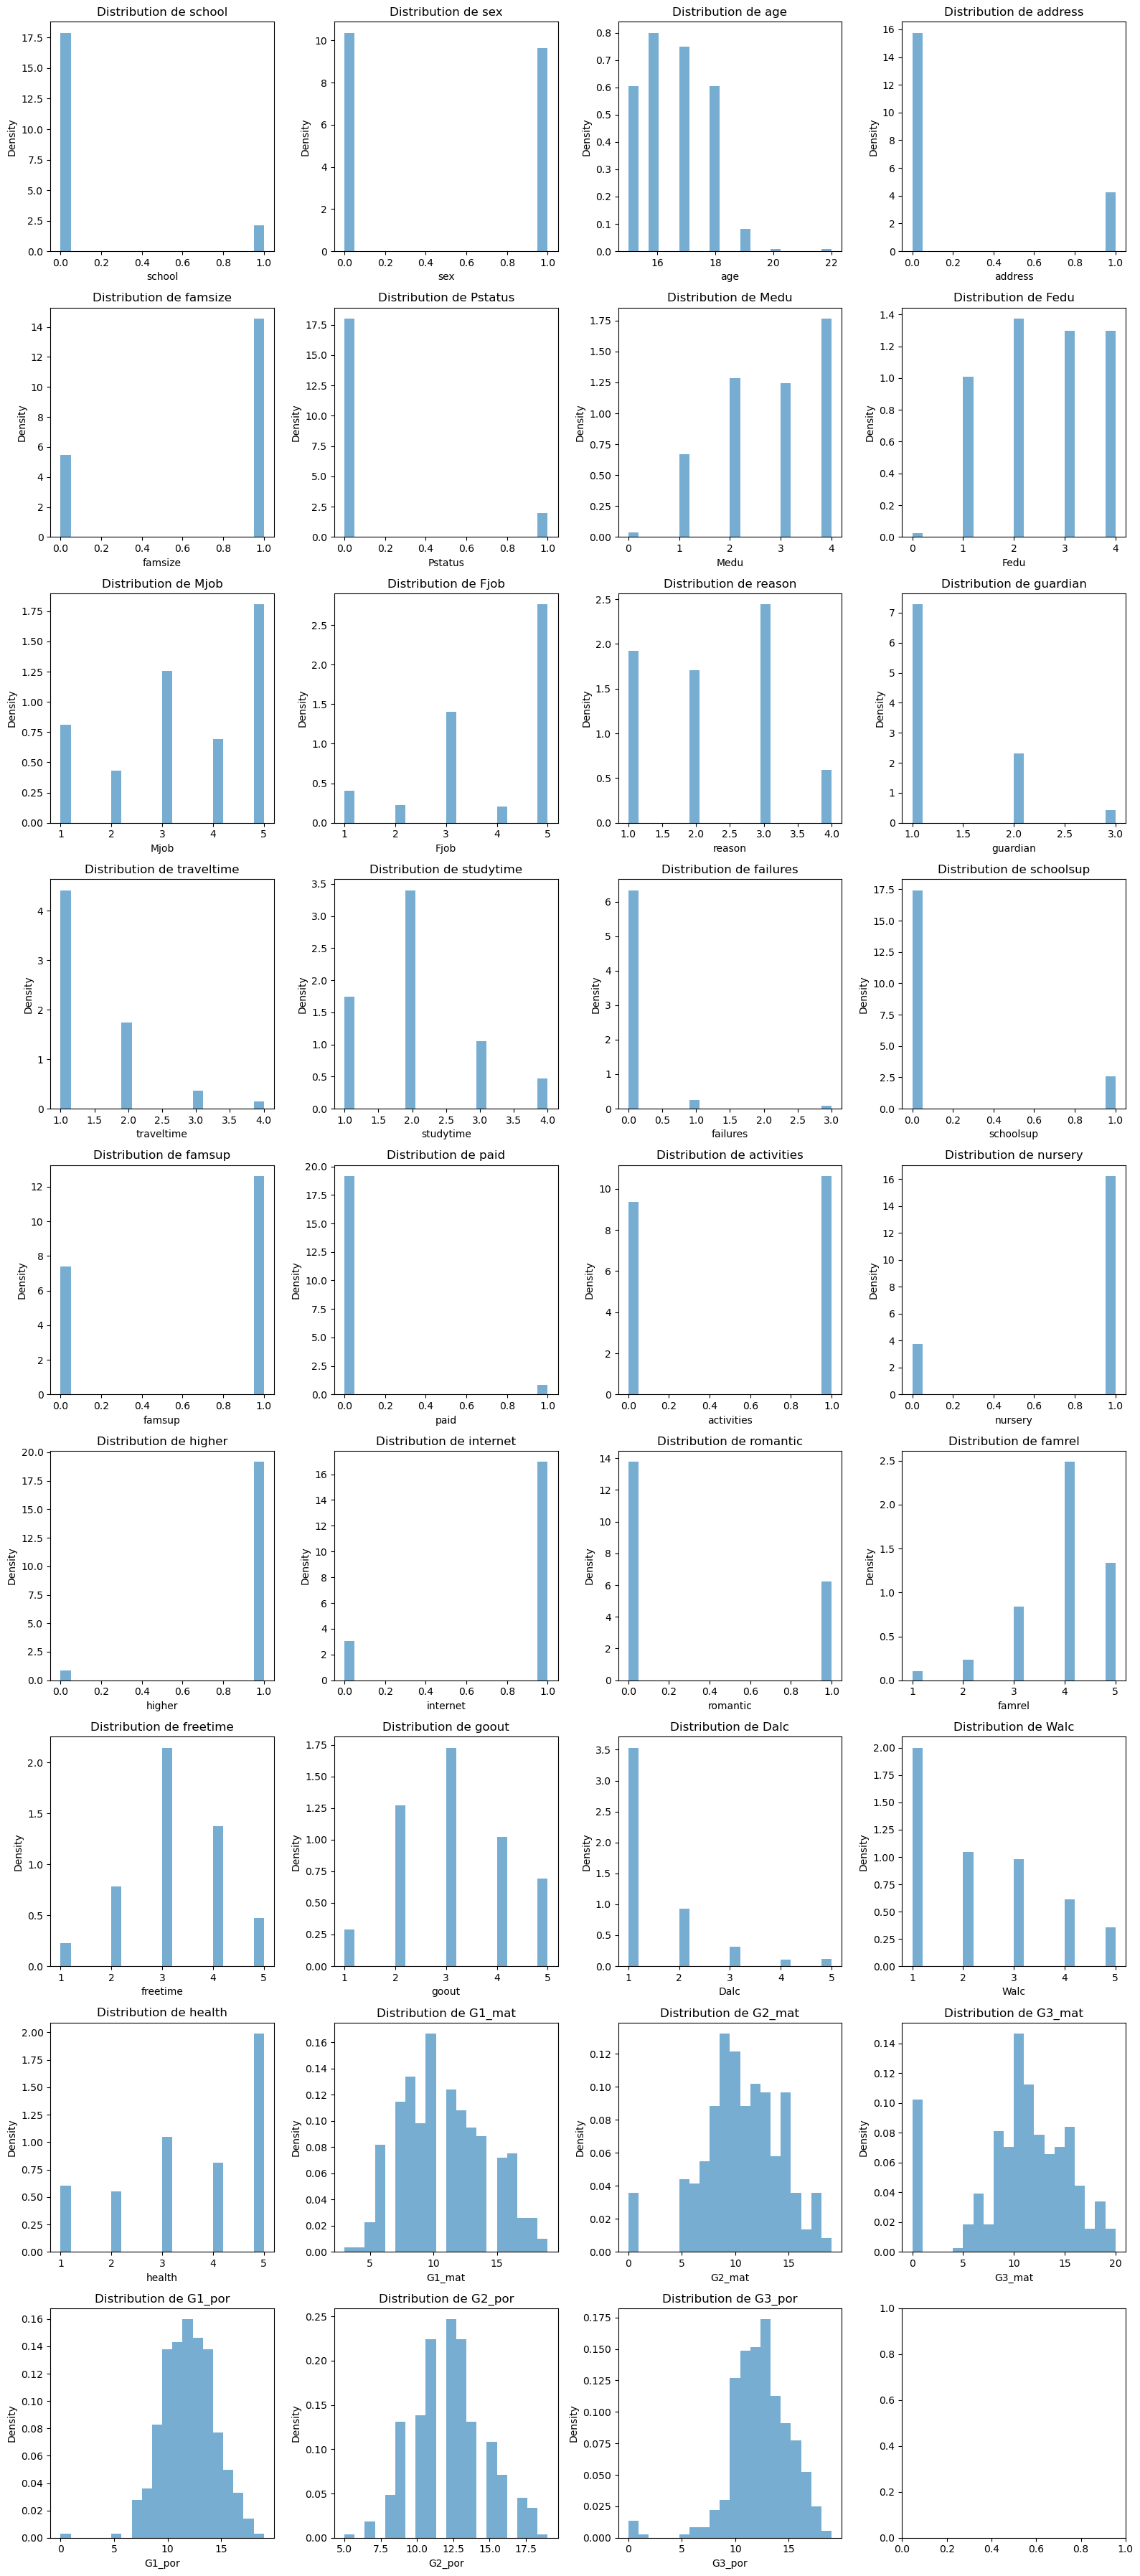

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposez que vous avez déjà chargé votre DataFrame ici (df)

# Calculer le nombre de lignes nécessaires pour afficher les sous-plots
num_cols = len(df.columns)
num_rows = (num_cols - 1) // 4 + 1

# Créer une figure et des sous-plots pour chaque colonne
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(16, 4*num_rows))

# Tracer les graphiques de distribution de chaque colonne
for i, column in enumerate(df.columns):
    row_idx = i // 4
    col_idx = i % 4
    axes[row_idx, col_idx].hist(df[column], bins=20, density=True, alpha=0.6)
    axes[row_idx, col_idx].set_title(f'Distribution de {column}')
    axes[row_idx, col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_ylabel('Density')

# Ajuster les espacements entre les sous-plots pour une meilleure présentation
plt.tight_layout()

# Afficher les graphiques
plt.show()

**Variable plot**

In [69]:
import ipywidgets as widgets
from IPython.display import display

def plot_distribution(column):
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=20, density=False, alpha=0.6)
    plt.title(f'Distribution de {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

# Créer un widget de sélection pour choisir la colonne
column_selector = widgets.Dropdown(
    options=df.columns,
    description='Choisissez une colonne:',
    disabled=False,
)

# Appliquer la fonction de tracé lorsque la valeur du widget change
widgets.interactive(plot_distribution, column=column_selector)


interactive(children=(Dropdown(description='Choisissez une colonne:', options=('school', 'sex', 'age', 'addres…

### Impact of variables on G3 (mat and por)


In [70]:
df['failures'].value_counts()

0.0    363
1.0     14
3.0      5
Name: failures, dtype: int64

###### 1. G3_mat

In [71]:
df.corr()['G3_mat'].sort_values(ascending=False)

G3_mat        1.000000
G2_mat        0.903027
G1_mat        0.805129
G2_por        0.535552
G1_por        0.495305
G3_por        0.480349
higher        0.215508
Medu          0.205489
Fedu          0.155444
sex           0.121671
internet      0.088002
studytime     0.081249
Pstatus       0.054703
nursery       0.047037
famrel        0.042003
activities    0.018324
freetime      0.010293
paid         -0.003347
reason       -0.008037
Walc         -0.018912
Dalc         -0.031820
famsup       -0.047944
guardian     -0.056731
school       -0.066661
health       -0.072346
schoolsup    -0.075230
Fjob         -0.082774
address      -0.092187
famsize      -0.110191
traveltime   -0.116327
goout        -0.117783
failures     -0.130867
romantic     -0.131748
Mjob         -0.136702
age          -0.194589
Name: G3_mat, dtype: float64

In [72]:
# Calculer les corrélations avec 'G3_mat'
correlations = df.corr()['G3_mat']

# Ne garder que les colonnes ayant une corrélation absolue supérieure ou égale à 0.1
selected_columns = correlations[abs(correlations) >= 0.1].index

# Sélectionner les colonnes correspondantes dans le DataFrame
df_mat = df[selected_columns]

#Drop all G, too correlated with G3
df_mat.drop(columns=['G1_mat', 'G2_mat',
       'G1_por', 'G2_por', 'G3_por'], inplace=True)
df_mat.columns

Index(['sex', 'age', 'famsize', 'Medu', 'Fedu', 'Mjob', 'traveltime',
       'failures', 'higher', 'romantic', 'goout', 'G3_mat'],
      dtype='object')

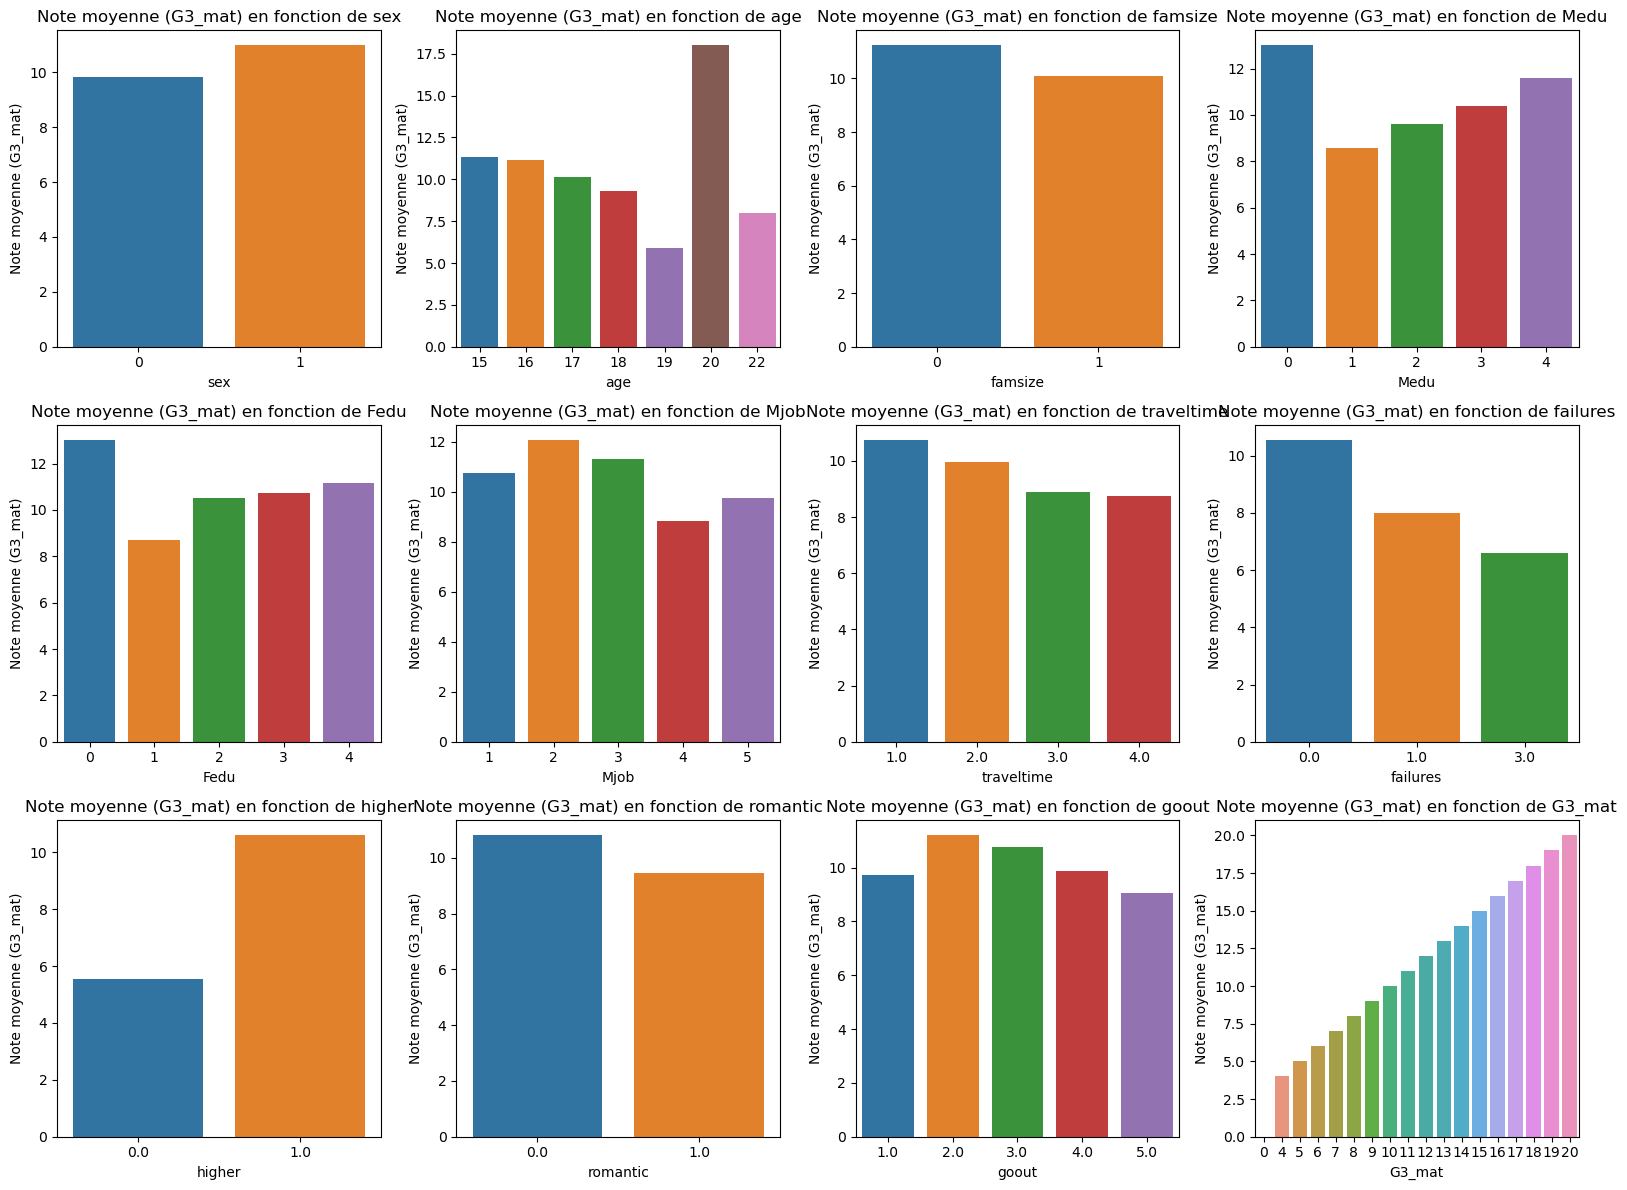

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppose you have already loaded your DataFrame (df)

# Calculate the number of rows and columns needed for the subplots
num_cols = len(df_mat.columns)
num_rows = (num_cols - 1) // 4 + 1

# Create a figure and subplots for each column
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(16, 4*num_rows))

# Iterate through each column and create subplots
for i, column in enumerate(df_mat.columns):
    row_idx = i // 4
    col_idx = i % 4

    # Calculate the mean of G3_mat for each category in the current column
    mean_grades_by_column = df_mat.groupby(column)['G3_mat'].mean()

    # Plot the bar plot for G3_mat mean by category in the current column
    sns.barplot(x=mean_grades_by_column.index, y=mean_grades_by_column.values, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f'Note moyenne (G3_mat) en fonction de {column}')
    axes[row_idx, col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_ylabel('Note moyenne (G3_mat)')

# Adjust spacing between subplots for better presentation
plt.tight_layout()

# Show the plots
plt.show()


In [74]:
# Group by G3 and calculate the mean of each variable
mean_values_by_G3_mat = df_mat.groupby('G3_mat')['sex', 'age', 'famsize', 'Medu', 'Fedu', 'Mjob', 'traveltime',
       'failures', 'higher', 'romantic', 'goout'].mean()

# Reset the index of the DataFrame to make 'G3' a regular column
mean_values_by_G3_mat.reset_index(inplace=True)

# Display the DataFrame
mean_values_by_G3_mat

,G3_mat,sex,age,famsize,Medu,Fedu,Mjob,traveltime,failures,higher,romantic,goout
0,0,0.410256,17.051282,0.871795,2.435897,2.333333,3.641026,1.564103,0.153846,0.846154,0.487179,3.153846
1,4,0.000000,17.000000,1.000000,4.000000,3.000000,5.000000,1.000000,0.000000,1.000000,1.000000,5.000000
2,5,0.571429,16.714286,0.857143,2.714286,2.571429,4.285714,1.142857,0.571429,1.000000,0.285714,4.000000
3,6,0.133333,16.333333,0.666667,2.733333,2.266667,4.066667,1.533333,0.000000,1.000000,0.133333,3.266667
4,7,0.428571,16.714286,0.714286,3.000000,2.142857,3.285714,1.714286,0.000000,0.857143,0.571429,3.285714
5,8,0.548387,17.161290,0.709677,2.483871,2.322581,3.612903,1.483871,0.225806,0.870968,0.290323,3.645161
6,9,0.370370,16.962963,0.740741,2.888889,2.703704,3.000000,1.333333,0.074074,0.925926,0.407407,3.259259
7,10,0.464286,16.607143,0.732143,2.553571,2.214286,3.535714,1.696429,0.107143,0.964286,0.196429,3.035714
8,11,0.395349,16.395349,0.767442,2.744186,2.720930,3.534884,1.372093,0.000000,1.000000,0.325581,3.023256
9,12,0.666667,16.400000,0.633333,2.633333,2.566667,3.800000,1.366667,0.033333,0.966667,0.466667,2.900000


###### 2. G3_por

In [75]:
df.corr()['G3_por'].sort_values(ascending=False)

G3_por        1.000000
G2_por        0.892444
G1_por        0.819048
G1_mat        0.550844
G2_mat        0.507500
G3_mat        0.480349
higher        0.298758
studytime     0.277339
Medu          0.203554
Fedu          0.172009
activities    0.098642
famsup        0.089838
internet      0.089055
Pstatus       0.078506
nursery       0.066287
famrel        0.036969
romantic     -0.029534
guardian     -0.030723
famsize      -0.042718
Fjob         -0.064237
age          -0.067977
freetime     -0.101722
reason       -0.117694
goout        -0.131696
schoolsup    -0.133784
traveltime   -0.139315
paid         -0.152158
school       -0.182032
health       -0.182704
address      -0.188918
Mjob         -0.190665
sex          -0.201064
Walc         -0.218241
failures     -0.265307
Dalc         -0.265815
Name: G3_por, dtype: float64

In [76]:
# Calculer les corrélations avec 'G3_por'
correlations = df.corr()['G3_por']

# Ne garder que les colonnes ayant une corrélation absolue supérieure ou égale à 0.1
selected_columns = correlations[abs(correlations) >= 0.1].index

# Sélectionner les colonnes correspondantes dans le DataFrame
df_por = df[selected_columns]

#Drop all G, too correlated with G3
df_por.drop(columns=['G1_mat', 'G2_mat', 'G3_mat',
       'G1_por', 'G2_por'], inplace=True)
df_por.columns

Index(['school', 'sex', 'address', 'Medu', 'Fedu', 'Mjob', 'reason',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'paid', 'higher',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'G3_por'],
      dtype='object')

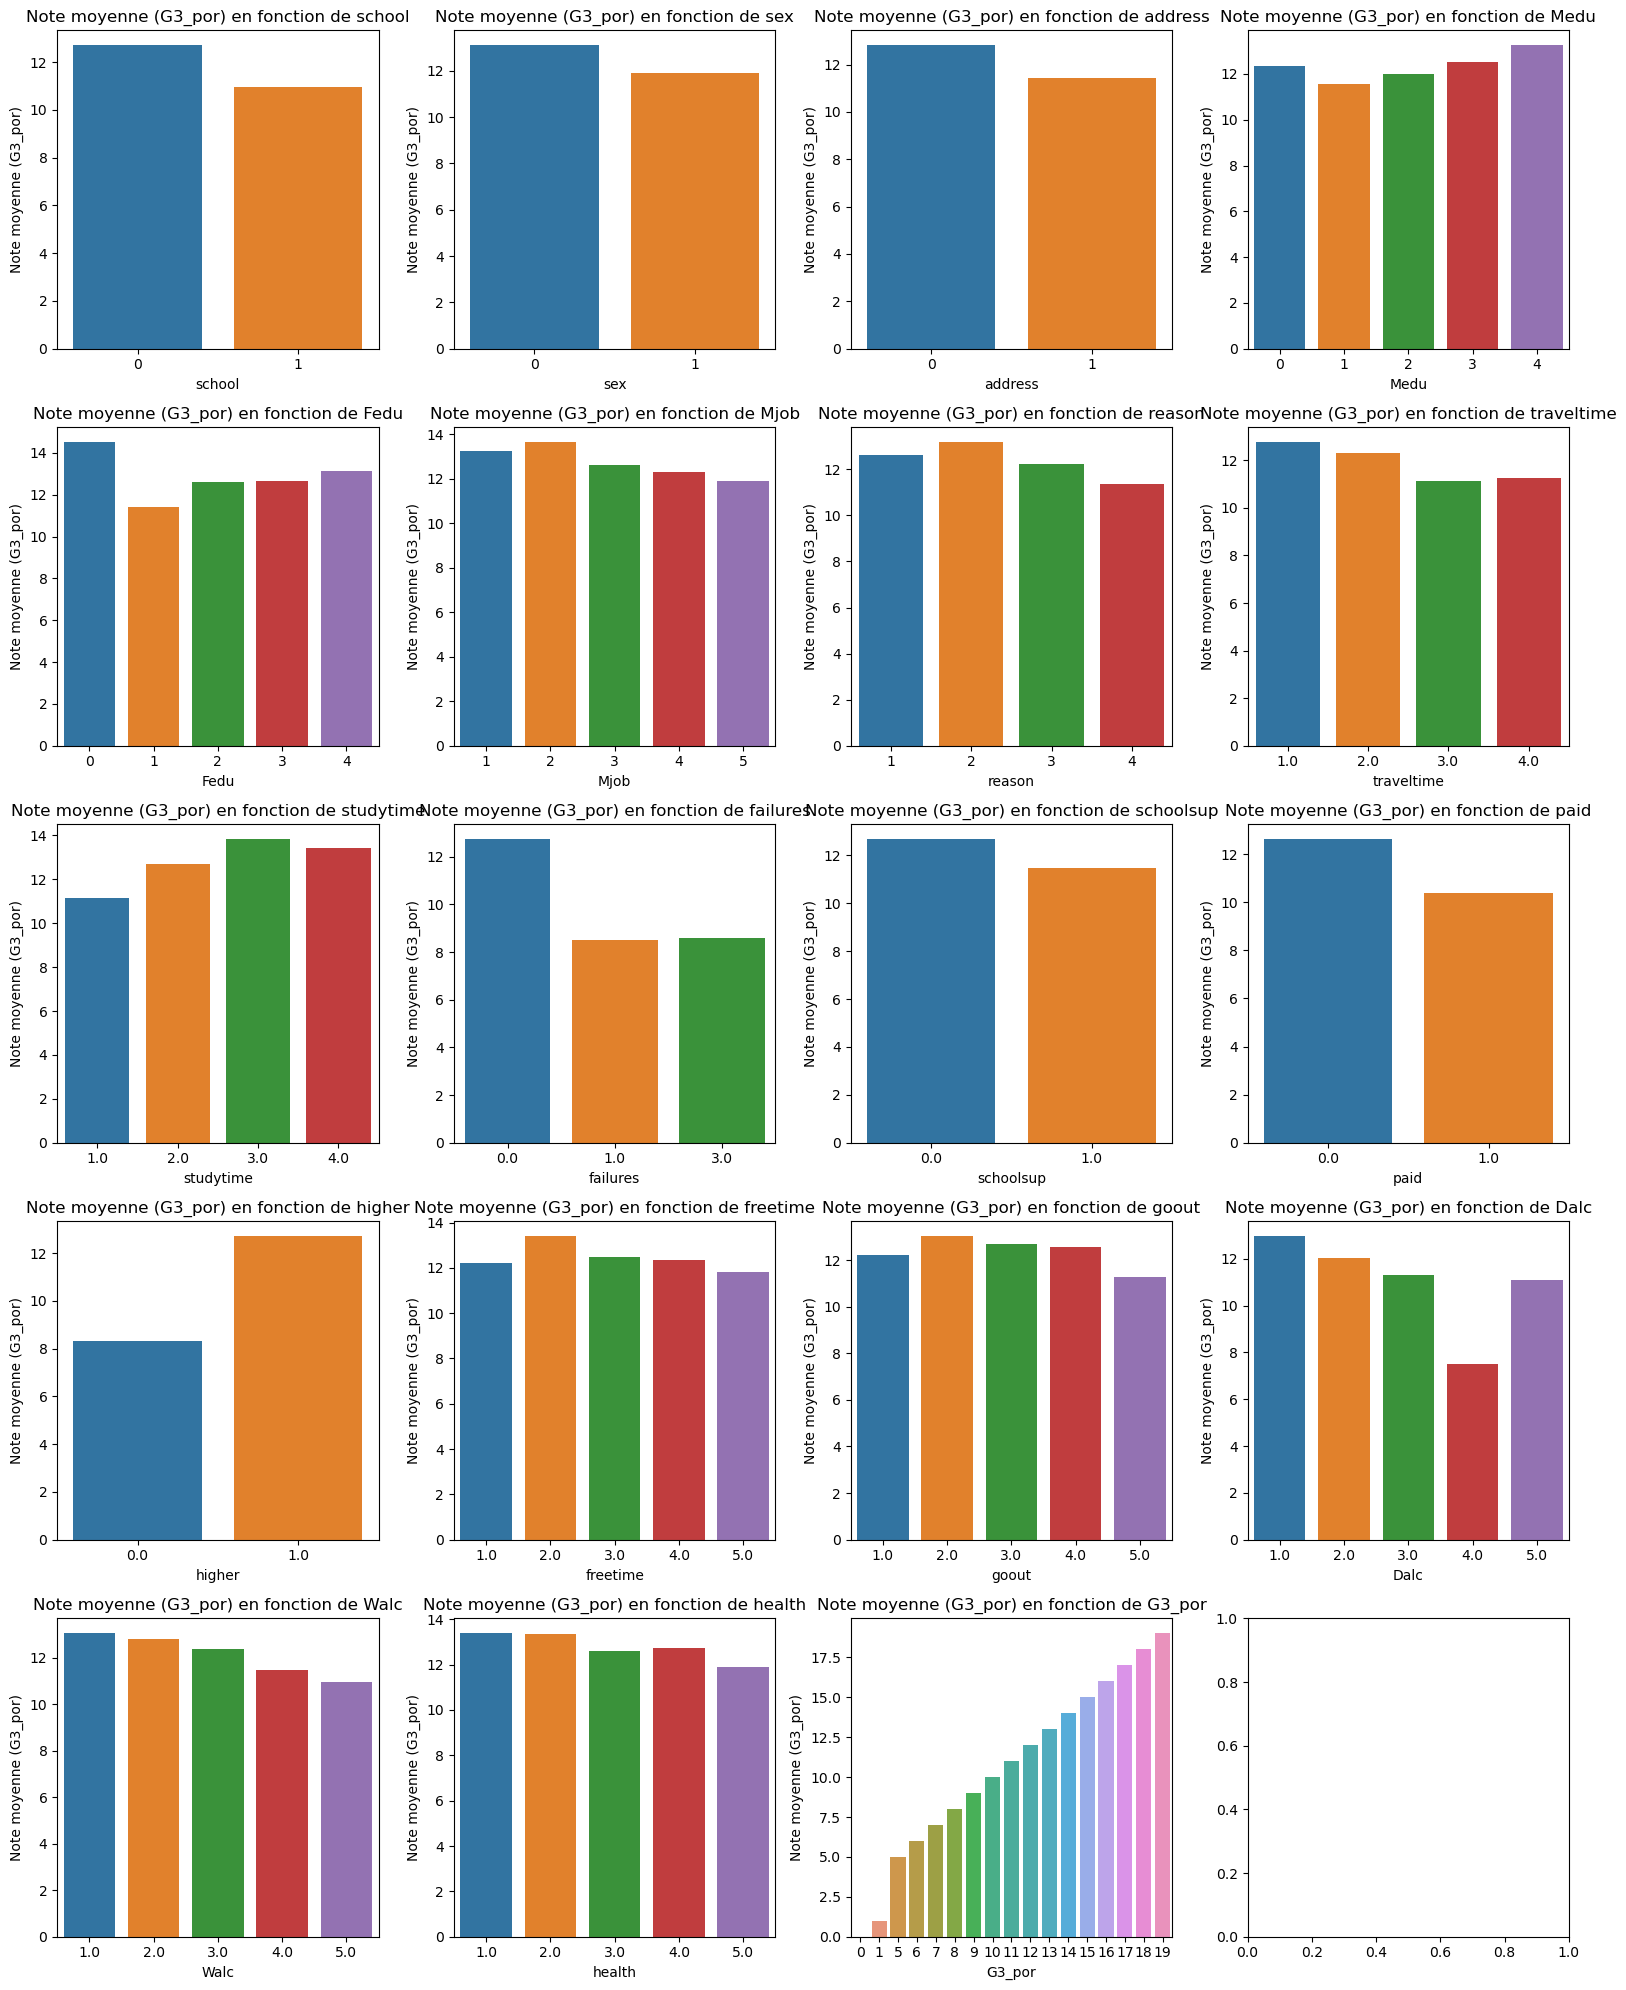

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppose you have already loaded your DataFrame (df)

# Calculate the number of rows and columns needed for the subplots
num_cols = len(df_por.columns)
num_rows = (num_cols - 1) // 4 + 1

# Create a figure and subplots for each column
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(16, 4*num_rows))

# Iterate through each column and create subplots
for i, column in enumerate(df_por.columns):
    row_idx = i // 4
    col_idx = i % 4

    # Calculate the mean of G3_mat for each category in the current column
    mean_grades_by_column = df_por.groupby(column)['G3_por'].mean()

    # Plot the bar plot for G3_mat mean by category in the current column
    sns.barplot(x=mean_grades_by_column.index, y=mean_grades_by_column.values, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f'Note moyenne (G3_por) en fonction de {column}')
    axes[row_idx, col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_ylabel('Note moyenne (G3_por)')

# Adjust spacing between subplots for better presentation
plt.tight_layout()

# Show the plots
plt.show()

## Features selection for ML

We will build 2 ML models for the two target variables, namely G3_mat and G3_por.

### Features reduction

#### G3_mat

In [78]:
dfbis.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'G1_mat', 'G2_mat', 'G3_mat', 'G1_por', 'G2_por',
       'G3_por', 'Mjob_1', 'Mjob_2', 'Mjob_3', 'Mjob_4', 'Mjob_5', 'Fjob_1',
       'Fjob_2', 'Fjob_3', 'Fjob_4', 'Fjob_5', 'reason_1', 'reason_2',
       'reason_3', 'reason_4', 'guardian_1.0', 'guardian_2.0', 'guardian_3.0',
       'traveltime_1.0', 'traveltime_2.0', 'traveltime_3.0', 'traveltime_4.0',
       'studytime_1.0', 'studytime_2.0', 'studytime_3.0', 'studytime_4.0'],
      dtype='object')

In [79]:
dfbis.corr()['G3_mat'].sort_values(ascending=False)

G3_mat            1.000000
G2_mat            0.903027
G1_mat            0.805129
G2_por            0.535552
G1_por            0.495305
G3_por            0.480349
higher            0.215508
Medu              0.205489
Fedu              0.155444
sex               0.121671
Mjob_3            0.115782
reason_2          0.111444
Mjob_2            0.109910
traveltime_1.0    0.102852
internet          0.088002
studytime_3.0     0.084152
Fjob_1            0.083944
Pstatus           0.054703
Fjob_2            0.052649
studytime_4.0     0.051363
nursery           0.047037
reason_4          0.046795
famrel            0.042003
guardian_2.0      0.038390
Mjob_1            0.034851
activities        0.018324
guardian_1.0      0.016701
freetime          0.010293
paid             -0.003347
Fjob_3           -0.010530
Walc             -0.018912
studytime_1.0    -0.025116
Fjob_4           -0.028471
reason_1         -0.030403
Dalc             -0.031820
Fjob_5           -0.046952
famsup           -0.047944
t

In [80]:
# Calculer les corrélations avec 'G3_por'
correlations = dfbis.corr()['G3_mat']

# Ne garder que les colonnes ayant une corrélation absolue supérieure ou égale à 0.1
selected_columns = correlations[abs(correlations) >= 0.1].index

# Sélectionner les colonnes correspondantes dans le DataFrame
df_MLM = dfbis[selected_columns]

#Drop all G, too correlated with G3
df_MLM.drop(columns=['G1_mat', 'G2_mat',
       'G1_por', 'G2_por', 'G3_por'], inplace=True)
df_MLM.columns

Index(['sex', 'age', 'famsize', 'Medu', 'Fedu', 'failures', 'higher',
       'romantic', 'goout', 'G3_mat', 'Mjob_2', 'Mjob_3', 'Mjob_4', 'Mjob_5',
       'reason_2', 'reason_3', 'guardian_3.0', 'traveltime_1.0'],
      dtype='object')

We observe that for the categorical variables:

- 4 out of 5 categories for Mjob => We will add the last category even if it is less explanatory.
- 2 out of 4 categories for reason => We will apply the same treatment.
- Only 1 category for guardian and traveltime => We will not keep these variables. 


These choices were made taking into account the context and the distribution of these variables.

In [81]:
#On applique les modifications
df_MLM[['Mjob_1', 'reason_1','reason_4']] = dfbis[['Mjob_1', 'reason_1','reason_4']]

In [82]:
df_MLM = df_MLM.drop(columns=['guardian_3.0', 'traveltime_1.0'])

In [83]:
df_MLM.columns

Index(['sex', 'age', 'famsize', 'Medu', 'Fedu', 'failures', 'higher',
       'romantic', 'goout', 'G3_mat', 'Mjob_2', 'Mjob_3', 'Mjob_4', 'Mjob_5',
       'reason_2', 'reason_3', 'Mjob_1', 'reason_1', 'reason_4'],
      dtype='object')

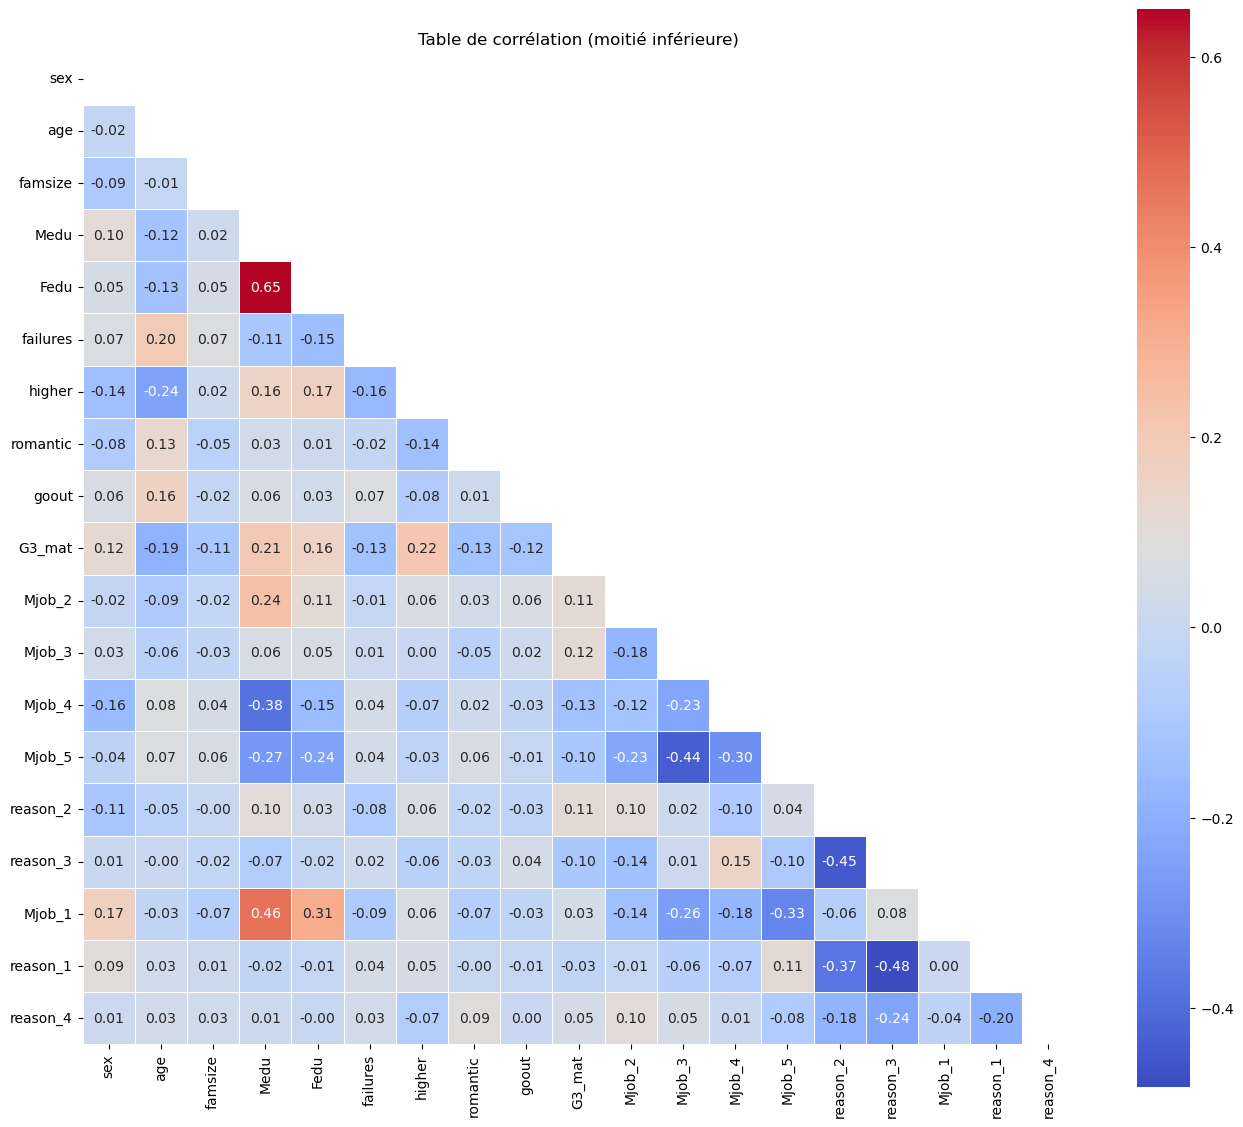

In [84]:
correlation_matrix = df_MLM.corr()

# Créer un masque pour la moitié supérieure de la table de corrélation
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Tracer la table de corrélation en escalier (heatmap) avec la moitié supérieure masquée
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True,
            mask=mask)
plt.title('Table de corrélation (moitié inférieure)')
plt.show()

#### G3_por

In [85]:
dfbis.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'G1_mat', 'G2_mat', 'G3_mat', 'G1_por', 'G2_por',
       'G3_por', 'Mjob_1', 'Mjob_2', 'Mjob_3', 'Mjob_4', 'Mjob_5', 'Fjob_1',
       'Fjob_2', 'Fjob_3', 'Fjob_4', 'Fjob_5', 'reason_1', 'reason_2',
       'reason_3', 'reason_4', 'guardian_1.0', 'guardian_2.0', 'guardian_3.0',
       'traveltime_1.0', 'traveltime_2.0', 'traveltime_3.0', 'traveltime_4.0',
       'studytime_1.0', 'studytime_2.0', 'studytime_3.0', 'studytime_4.0'],
      dtype='object')

In [86]:
dfbis.corr()['G3_por'].sort_values(ascending=False)

G3_por            1.000000
G2_por            0.892444
G1_por            0.819048
G1_mat            0.550844
G2_mat            0.507500
G3_mat            0.480349
higher            0.298758
Medu              0.203554
studytime_3.0     0.190911
Fedu              0.172009
reason_2          0.129316
Mjob_2            0.117148
Mjob_1            0.113498
traveltime_1.0    0.112014
activities        0.098642
famsup            0.089838
internet          0.089055
studytime_4.0     0.083600
Fjob_4            0.083289
Pstatus           0.078506
Fjob_1            0.071741
nursery           0.066287
studytime_2.0     0.057746
famrel            0.036969
Fjob_2            0.026900
reason_1          0.026085
Mjob_3            0.023578
guardian_1.0      0.021260
guardian_2.0     -0.005035
Mjob_4           -0.026600
romantic         -0.029534
Fjob_3           -0.030085
guardian_3.0     -0.036656
traveltime_2.0   -0.041643
famsize          -0.042718
Fjob_5           -0.056938
traveltime_4.0   -0.062931
a

In [87]:
# Calculer les corrélations avec 'G3_por'
correlations = dfbis.corr()['G3_por']

# Ne garder que les colonnes ayant une corrélation absolue supérieure ou égale à 0.1
selected_columns = correlations[abs(correlations) >= 0.1].index

# Sélectionner les colonnes correspondantes dans le DataFrame
df_MLP = dfbis[selected_columns]

#Drop all G, too correlated with G3
df_MLP.drop(columns=['G1_mat', 'G2_mat', 'G3_mat',
       'G1_por', 'G2_por'], inplace=True)
df_MLP.columns

Index(['school', 'sex', 'address', 'Medu', 'Fedu', 'failures', 'schoolsup',
       'paid', 'higher', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'G3_por', 'Mjob_1', 'Mjob_2', 'Mjob_5', 'reason_2', 'reason_4',
       'traveltime_1.0', 'traveltime_3.0', 'studytime_1.0', 'studytime_3.0'],
      dtype='object')

We observe that for the categorical variables:

- 3 out of 5 categories for Mjob => We will add the last two categories even if they are less explanatory.
- 2 out of 4 categories for reason and studytime => We will apply the same treatment.
- 2 out of 4 categories for traveltime => We will remove it as the distribution is too one-sided.

These choices were made taking into account the context and the distribution of these variables.

In [88]:
#On applique les modifications
df_MLP[['Mjob_3','Mjob_4', 'reason_1','reason_3','studytime_2.0','studytime_4.0']] = dfbis[['Mjob_3','Mjob_4', 'reason_1','reason_3','studytime_2.0','studytime_4.0']]

In [89]:
df_MLP = df_MLP.drop(columns=['traveltime_1.0', 'traveltime_3.0'])

In [90]:
df_MLP.columns

Index(['school', 'sex', 'address', 'Medu', 'Fedu', 'failures', 'schoolsup',
       'paid', 'higher', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'G3_por', 'Mjob_1', 'Mjob_2', 'Mjob_5', 'reason_2', 'reason_4',
       'studytime_1.0', 'studytime_3.0', 'Mjob_3', 'Mjob_4', 'reason_1',
       'reason_3', 'studytime_2.0', 'studytime_4.0'],
      dtype='object')

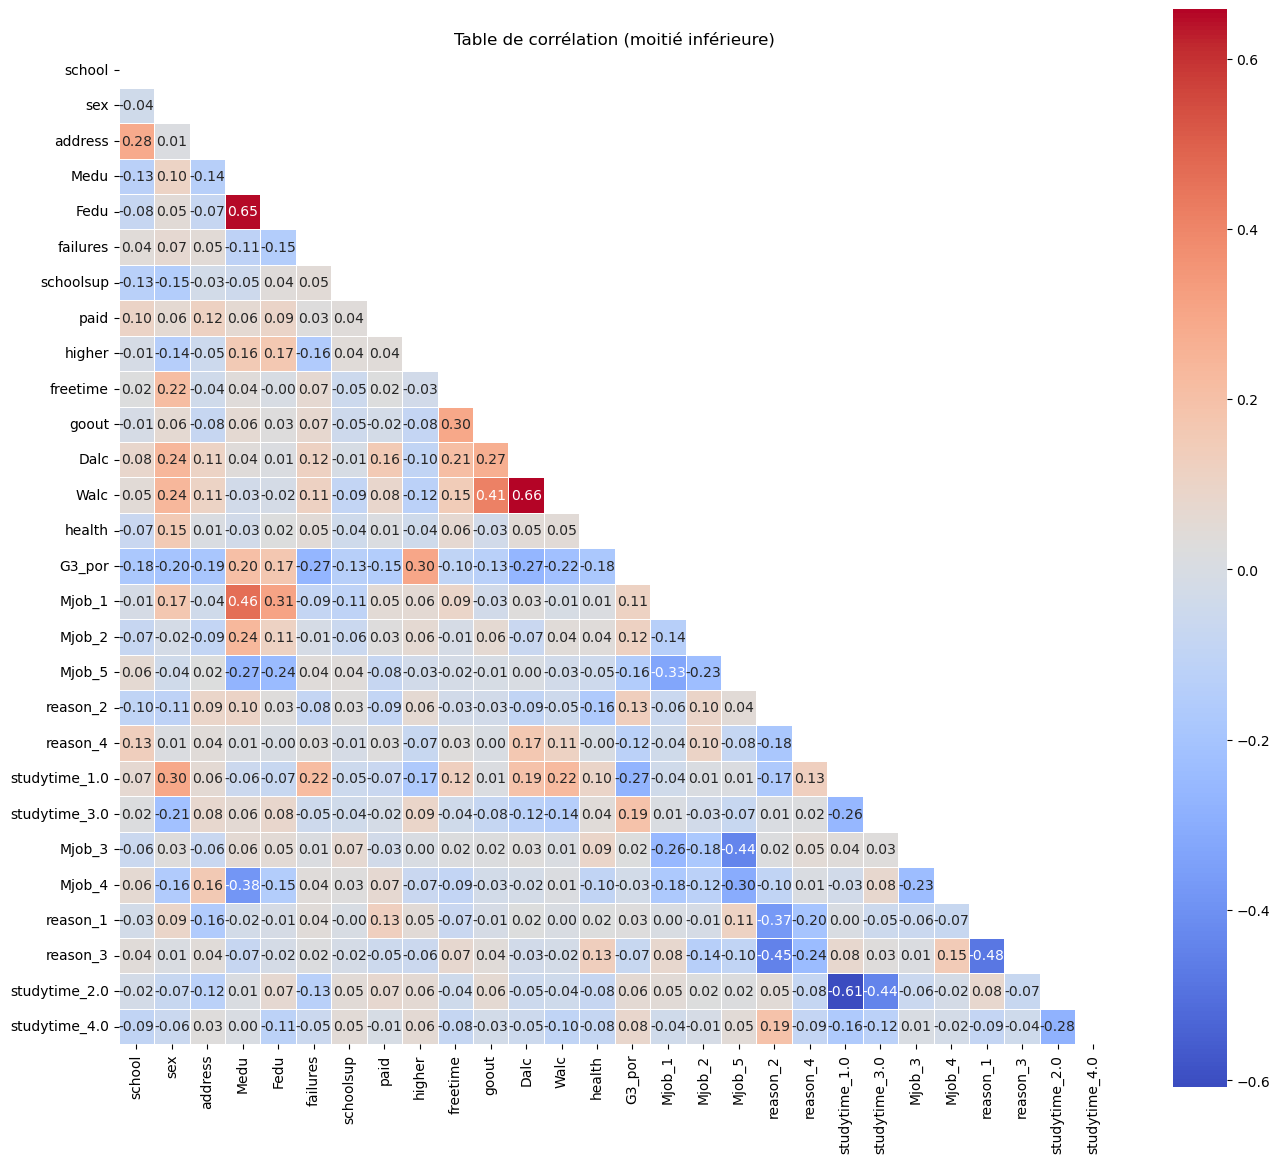

In [91]:
correlation_matrix = df_MLP.corr()

# Créer un masque pour la moitié supérieure de la table de corrélation
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Tracer la table de corrélation en escalier (heatmap) avec la moitié supérieure masquée
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True,
            mask=mask)
plt.title('Table de corrélation (moitié inférieure)')
plt.show()

### ML selection

#### Are our variables linear with the target variable?

##### G3_mat

In [92]:
# We define X and Y
X_mat = df_MLM.drop(columns='G3_mat')
Y_mat = df_MLM['G3_mat']

print('X shape:', X_mat.shape)
print(' ')
print('Y shape:', Y_mat.shape)

X shape: (382, 18)
 
Y shape: (382,)


NameError: name 'target' is not defined

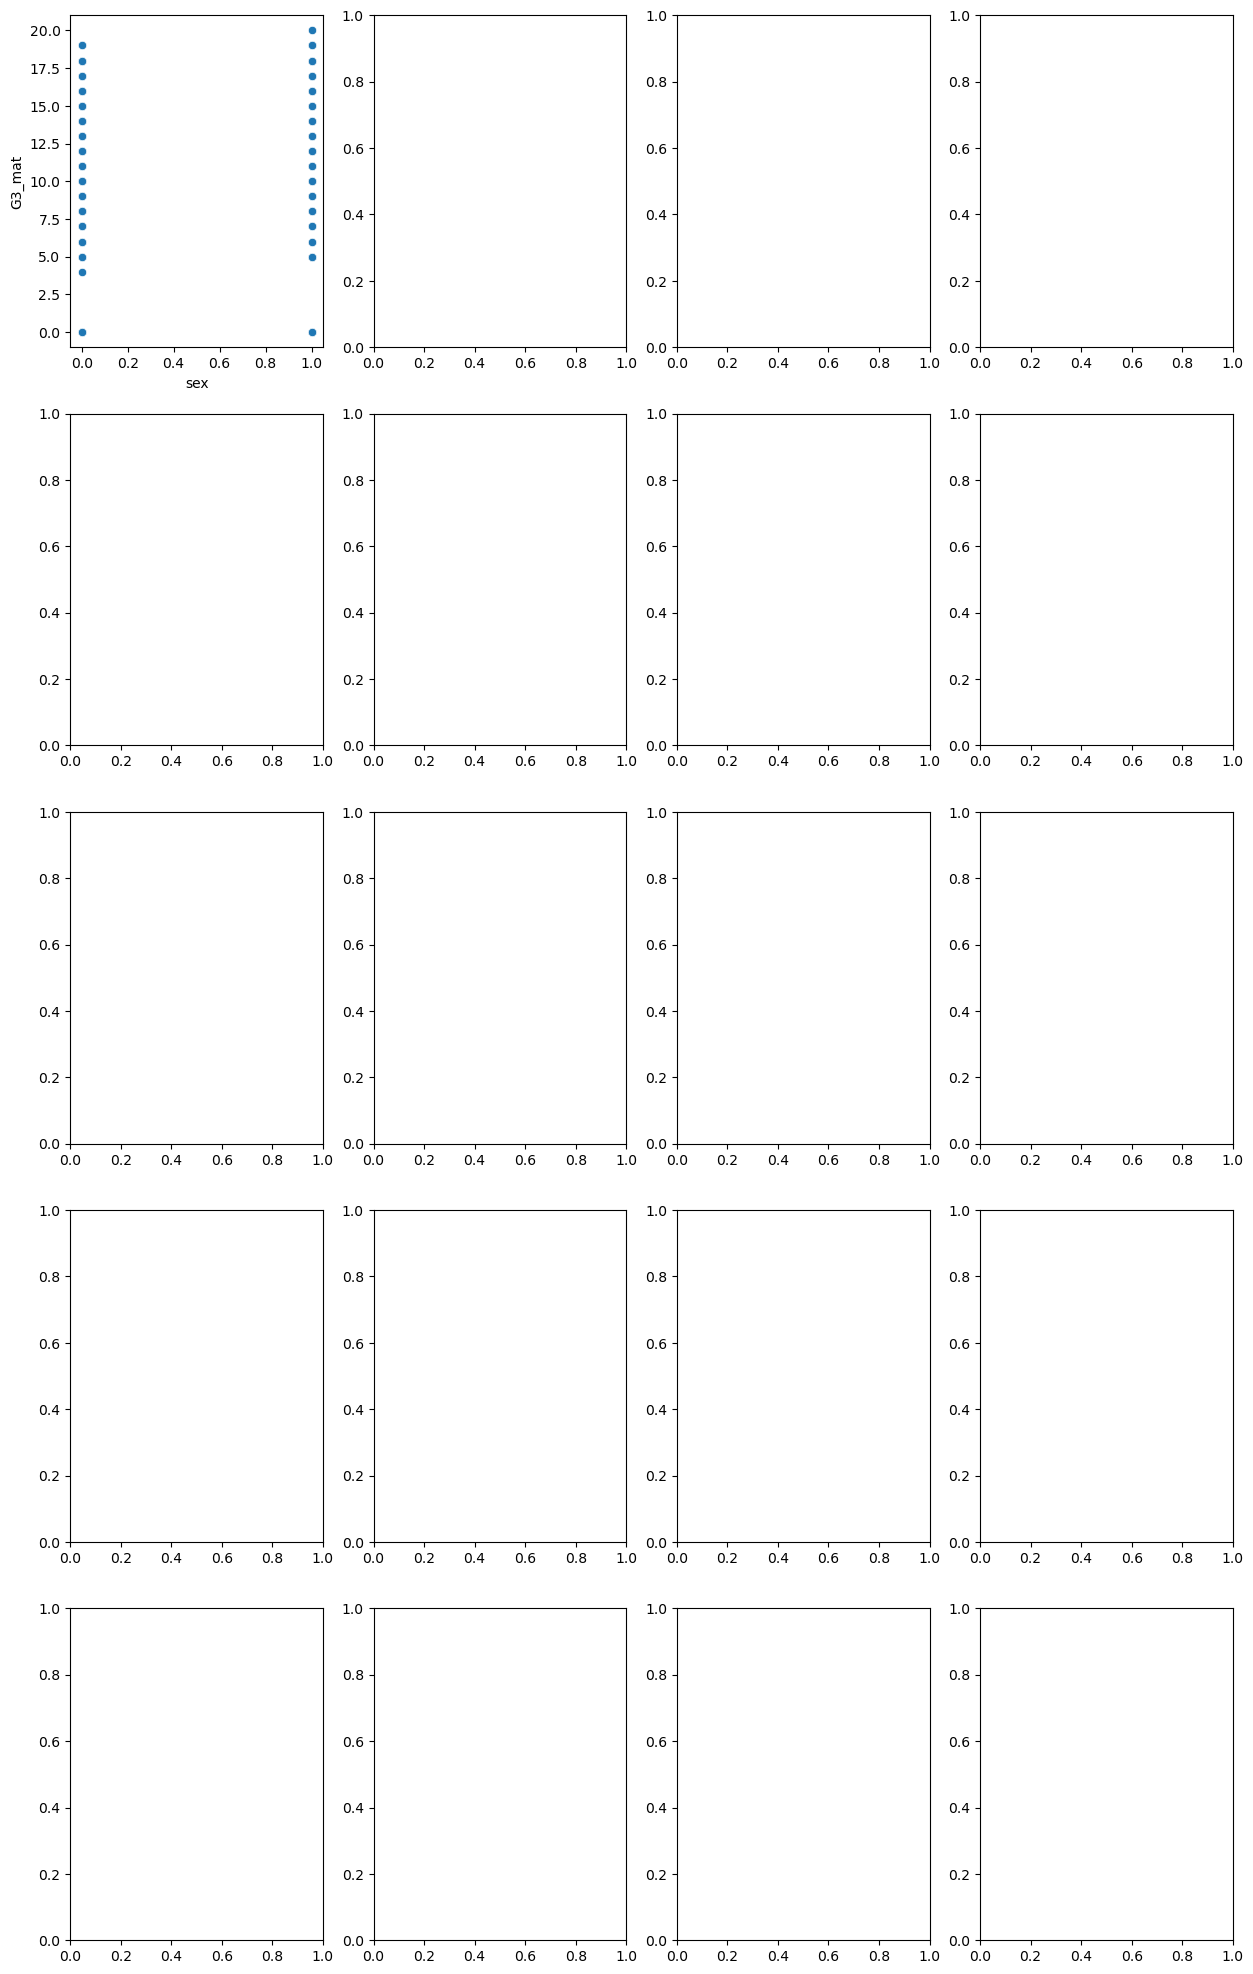

In [93]:
# Calculer le nombre de lignes et de colonnes nécessaires pour les sous-graphiques
num_features = X_mat.shape[1]
num_rows = (num_features - 1) // 4 + 1
num_cols = min(num_features, 4)

# Créer les sous-graphiques
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Afficher les scatter plots pour chaque caractéristique par rapport à la cible
for i, feature in enumerate(X_mat.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    sns.scatterplot(x=X_mat[feature], y=Y_mat, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_xlabel(feature)
    axes[row_idx, col_idx].set_ylabel(target)

# Supprimer les sous-graphiques vides s'il en reste
if num_features < num_rows * num_cols:
    for i in range(num_features, num_rows * num_cols):
        row_idx = i // num_cols
        col_idx = i % num_cols
        fig.delaxes(axes[row_idx, col_idx])

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

**We observe that there is no linearity.**

##### G3_por

In [ ]:
# We define X and Y
X_por = df_MLP.drop(columns='G3_por')
Y_por = df_MLP['G3_por']

print('X shape:', X_por.shape)
print(' ')
print('Y shape:', Y_por.shape)

In [ ]:
# Calculer le nombre de lignes et de colonnes nécessaires pour les sous-graphiques
num_features = X_por.shape[1]
num_rows = (num_features - 1) // 4 + 1
num_cols = min(num_features, 4)

# Créer les sous-graphiques
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Afficher les scatter plots pour chaque caractéristique par rapport à la cible
for i, feature in enumerate(X_por.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    sns.scatterplot(x=X_por[feature], y=Y_por, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_xlabel(feature)
    axes[row_idx, col_idx].set_ylabel(target)

# Supprimer les sous-graphiques vides s'il en reste
if num_features < num_rows * num_cols:
    for i in range(num_features, num_rows * num_cols):
        row_idx = i // num_cols
        col_idx = i % num_cols
        fig.delaxes(axes[row_idx, col_idx])

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

**We observe that there is no linearity.**

#### GridSearchCV

Even though our variables are not linear, we will test a set of linear regression models and other non-linear models.

##### G3_mat

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Votre DataFrame X contenant les caractéristiques et votre pd.Series y pour la cible
# Assurez-vous que les noms des colonnes dans 'X' correspondent aux noms des caractéristiques

# Liste des modèles avec leurs hyperparamètres
models = [
    {'name': 'Linear Regression', 'model': LinearRegression()},
    {'name': 'Ridge', 'model': Ridge()},
    {'name': 'Lasso', 'model': Lasso()},
    {'name': 'ElasticNet', 'model': ElasticNet()},
    {'name': 'Decision Tree Regressor', 'model': DecisionTreeRegressor()},
    {'name': 'Random Forest Regressor', 'model': RandomForestRegressor()},
    {'name': 'Support Vector Regressor', 'model': SVR()}
]

# Préparer un DataFrame pour stocker les résultats
results_df = pd.DataFrame(columns=['Model', 'R²', 'RMSE', 'MAE'])

for model_info in models:
    model = model_info['model']
    name = model_info['name']
    
    # Effectuer la validation croisée pour chaque modèle
    cv_scores = cross_val_score(model, X_mat, Y_mat, cv=5, scoring='neg_mean_squared_error')
    cv_mse = -cv_scores.mean()
    
    # Calculer le R², RMSE et MAE pour chaque modèle
    model.fit(X_mat, Y_mat)
    y_pred = model.predict(X_mat)
    r_squared = model.score(X_mat, Y_mat)
    rmse = mean_squared_error(Y_mat, y_pred, squared=False)
    mae = mean_absolute_error(Y_mat, y_pred)
    
    # Enregistrer les résultats dans le DataFrame
    results_df = results_df.append({'Model': name, 'R²': r_squared, 'RMSE': rmse, 'MAE': mae}, ignore_index=True)

    print(f"{name} - R²: {r_squared:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")

# Afficher le tableau de comparaison
print("\nTableau de comparaison des modèles :")
print(results_df)

**Results:**

As expected, linear models show disappointing results due to the nature of the data.


The SVC shows decent but insufficient results.  


The Decision Tree Regressor and the Random Forest Regressor exhibit the best performance (high R² and low RMSE). Therefore, we will focus on these two models.

In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Grid de paramètres pour le Decision Tree Regressor
param_grid_dt = {
    'max_depth': [None, 5, 10],  # Valeurs pour la profondeur maximale de l'arbre
    'min_samples_split': [2, 5, 10],  # Valeurs pour le nombre minimum d'échantillons requis pour diviser un nœud
    'min_samples_leaf': [1, 2, 4]  # Valeurs pour le nombre minimum d'échantillons requis dans une feuille
}

# Grid de paramètres pour le Random Forest Regressor
param_grid_rf = {
    'n_estimators': [100, 200, 500],  # Nombre d'arbres dans la forêt
    'max_depth': [None, 5, 10],  # Profondeur maximale des arbres
    'min_samples_split': [2, 5, 10],  # Nombre minimum d'échantillons requis pour diviser un nœud
    'min_samples_leaf': [1, 2, 4]  # Nombre minimum d'échantillons requis dans une feuille
}

# Modèle Decision Tree Regressor
dt_model = DecisionTreeRegressor()

# Modèle Random Forest Regressor
rf_model = RandomForestRegressor()

# GridSearchCV pour le Decision Tree Regressor
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='neg_mean_squared_error')
grid_search_dt.fit(X_mat, Y_mat)

# GridSearchCV pour le Random Forest Regressor
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_mat, Y_mat)

# Meilleurs hyperparamètres et résultats pour le Decision Tree Regressor
best_params_dt = grid_search_dt.best_params_
best_score_dt = -grid_search_dt.best_score_
print("Meilleurs hyperparamètres pour le Decision Tree Regressor:")
print(best_params_dt)
print("Meilleur score (RMSE) pour le Decision Tree Regressor:", best_score_dt)

# Meilleurs hyperparamètres et résultats pour le Random Forest Regressor
best_params_rf = grid_search_rf.best_params_
best_score_rf = -grid_search_rf.best_score_
print("\nMeilleurs hyperparamètres pour le Random Forest Regressor:")
print(best_params_rf)
print("Meilleur score (RMSE) pour le Random Forest Regressor:", best_score_rf)


**Results:**

We realize that unlike CrossValidate, the results obtained from GridSearch are very disappointing. To complete the process, we will still test the best model, but moving towards classification seems more promising

######  Model

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_mat, Y_mat, test_size=0.3, random_state=42)

In [ ]:
rfr = RandomForestRegressor()
rfr.set_params(**best_params_rf)

In [ ]:
rfr.fit(X_train, y_train)

In [ ]:
rfr.score(X_test,y_test)

Our model is bad

In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, train_sizes, cv):
    # Calcule les scores d'apprentissage et de test pour différentes tailles d'échantillons d'entraînement
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=train_sizes, cv=cv, scoring='r2')
    
    # Calcule les scores moyens et les écarts-types pour les scores d'apprentissage et de test
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    # Trace la courbe d'apprentissage
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, label='Score d\'apprentissage', color='blue')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    plt.plot(train_sizes, test_mean, label='Score de test', color='red')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')
    
    # Personnalise le graphique
    plt.title('Courbe d\'apprentissage')
    plt.xlabel('Taille de l\'échantillon d\'entraînement')
    plt.ylabel('Score R²')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Utilisation de la fonction plot_learning_curve avec votre modèle rfr et vos données X_train, y_train
# Réglez train_sizes en fonction du nombre d'échantillons d'entraînement souhaité (par exemple, np.linspace(0.1, 1.0, 10))
plot_learning_curve(rfr, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

In [ ]:
test_df.head(2)

In [102]:
'''
Merge our dataframes.
Final dataframe got 382 students.
We removed the columns G1 and G2 as they were highly correlated with the target variable. 
Additionally, we dropped the 'absences' column due to a large number of missing values.

'''

def merge_dataframes(df1, df2):

    # Columns used for merging
    keys_to_merge = [
        'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
        'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet'
    ]

    # Merge DataFrames using the merge keys and adding suffixes to columns in case of duplicates
    merged_df = df1.merge(df2, on=keys_to_merge, suffixes=('_mat', '_por'))

    # Get the list of columns that contain '_mat' and '_por'
    matporcol = [
        col for col in merged_df.columns if '_mat' in col or '_por' in col
    ]

    # Remove the suffixes and then duplicates to obtain unique column names
    cols_unique = merged_df[matporcol].columns.str.replace(
        '_mat', '').str.replace('_por', '').drop_duplicates()

    # Remove exam results as they are different for the two datasets
    cols_unique = cols_unique.drop(cols_unique[-3:])

    # Create a list of column pairs to merge similar columns
    column_pairs = [(col + '_mat', col + '_por') for col in cols_unique]

    # Loop to merge columns in similar pairs
    for col_mat, col_por in column_pairs:
        merged_df[col_mat] = merged_df[col_mat].where(
            merged_df[col_mat] == merged_df[col_por])

    # Remove the '_y' columns after merging if needed
    for _, col_por in column_pairs:
        merged_df.drop(columns=[col_por], inplace=True)

    merged_df = merged_df.drop(columns=['absences_mat', 'G1_mat', 'G2_mat', 'G1_por','G2_por'])

    columns_to_exclude = ['G3_mat', 'G3_por']
    columns_to_rename = [col for col in merged_df.columns if col not in columns_to_exclude]

    for col in columns_to_rename:
        if col.endswith('_mat'):
            new_col_name = col.replace('_mat', '')
            merged_df.rename(columns={col: new_col_name}, inplace=True)

    return merged_df

data_test = merge_dataframes(df_mat, df_por)
data_test.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'G3_mat', 'G3_por'],
      dtype='object')

In [106]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

# Define the features and target variables
X = data_test[[
    'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
    'Mjob', 'Fjob', 'reason', 'nursery', 'internet', 'Medu', 'Fedu',
    'traveltime', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health'
]]
Y = data_test[['G3_mat', 'G3_por']]  # Two target variables G3_mat and G3_por

# Define the columns for OneHotEncoding and OrdinalEncoding, and Scaling

ordinal_cols = [
    'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
    'freetime', 'goout', 'Dalc', 'Walc', 'health'
]
categorical_cols = [
    'school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup',
    'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'Mjob',
    'Fjob', 'reason', 'guardian'
]

numeric_cols = ['age']

# Créer un transformateur pour les variables ordinales
ordinal_encoder = OrdinalEncoder(categories=[
    [0, 1, 2, 3, 4],  # Medu
    [0, 1, 2, 3, 4],  # Fedu
    [0, 1, 2, 3, 4],  # traveltime
    [0, 1, 2, 3, 4],  # studytime
    [1, 2, 3, 4, 5],  # famrel
    [1, 2, 3, 4, 5],  # freetime
    [1, 2, 3, 4, 5],  # goout
    [1, 2, 3, 4, 5],  # Dalc
    [1, 2, 3, 4, 5],  # Walc
    [1, 2, 3, 4, 5],  # health
])

# Créer la pipeline avec le transformateur ColumnTransformer
pipeline = make_pipeline(
    ColumnTransformer(
        [('ordinal_encode', ordinal_encoder, ordinal_cols),
         ('onehot_encode', OneHotEncoder(), categorical_cols),
         ('numeric_scale', StandardScaler(), numeric_cols)],
        remainder='passthrough'))

# Appliquer la pipeline aux données
df_transformed = pipeline.fit_transform(data_test)

# Convertir le résultat en DataFrame pour visualisation
df_transformed = pd.DataFrame(df_transformed)

ValueError: Shape mismatch: if categories is an array, it has to be of shape (n_features,).

In [94]:
df_transformed

NameError: name 'df_transformed' is not defined